In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('../data/ozone.csv')
data = df[['Temp', 'Ozone']]
display(data)

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
4,56,NaN
...,...,...
148,70,30.0
149,77,NaN
150,75,14.0
151,76,18.0


In [3]:
# 결측치 확인
print('오존의 결측치 : {}개'.format(data['Ozone'].isnull().sum()))
print('온도의 결측치 : {}개'.format(data['Temp'].isnull().sum()))

오존의 결측치 : 37개
온도의 결측치 : 0개


In [4]:
# 결측치 처리
data = data.dropna(how='any')
display(data)

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


In [30]:
data.describe()

,Temp,Ozone
count,116.000000,116.000000
mean,77.870690,42.129310
std,9.485486,32.987885
min,57.000000,1.000000
25%,71.000000,18.000000
50%,79.000000,31.500000
75%,85.000000,63.250000
max,97.000000,168.000000


In [5]:
# 1. training data
x_data = data[['Temp']].values
t_data = data['Ozone'].values.reshape(-1,1)

- Tendorflow

In [ ]:
import tensorflow as tf

In [6]:
# 2. placeholder
X = tf.placeholder(shape=[None,1], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 3. Weight & bias
W = tf.Variable(tf.random.normal([1,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 4. model
H = tf.matmul(X, W) + b

# 5. loss function
loss = tf.reduce_mean(tf.square(H - T))

# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# 7. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
# 8. 학습
for step in range(30000):
    _,W_val,b_val,loss_val = sess.run([train, W, b, loss ], 
                                      feed_dict={X : x_data, T : t_data})
    
    if step % 3000 == 0:
        print('W : {}, b : {}, loss :{}'.format(W_val, b_val, loss_val))

W : [[0.5005274]], b : [0.7854434], loss :889.9051513671875
W : [[0.5746221]], b : [-0.4934553], loss :863.8118896484375
W : [[0.5906765]], b : [-1.7620064], loss :858.4468383789062
W : [[0.6065919]], b : [-3.0195768], loss :853.1744384765625
W : [[0.62236935]], b : [-4.2662506], loss :847.992919921875
W : [[0.6380102]], b : [-5.5021276], loss :842.9007568359375
W : [[0.6535157]], b : [-6.72731], loss :837.8963623046875
W : [[0.6688871]], b : [-7.941888], loss :832.9781494140625
W : [[0.68412375]], b : [-9.145835], loss :828.1453857421875
W : [[0.69923073]], b : [-10.339525], loss :823.3951416015625


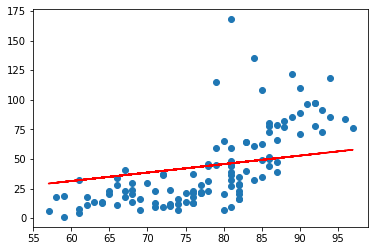

[[47.042076]]


In [8]:
import matplotlib.pyplot as plt

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*W_val + b_val, color='r')
plt.show()

# 9. predict
result = sess.run(H, feed_dict={X : [[82]] })
print(result)

W : [[2.4287033]], b : [-146.99549097]
[[52.15818003]]


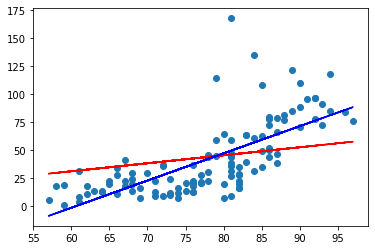

In [9]:
from sklearn import linear_model

# 2. model
model = linear_model.LinearRegression()

# 3. 학습
model.fit(x_data, t_data)

# 4. Weight & bias
# W : [[1.6470598]], b : [-85.23316] - tensorflow
print('W : {}, b : {}'.format(model.coef_, model.intercept_))

# 5. predict
# [[50.020073]] - tensorflow
print(model.predict([[82]]))

# 6. 시각화하여 tensorflow와 비교
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*W_val + b_val, color='r')
plt.plot(x_data, x_data*model.coef_ + model.intercept_, color='b')
plt.show()

# 이상치 처리
---
## 1. boxplot을 이용하여 이상치를 확인

8.0
4.5
8.0
11.5
[22.1]


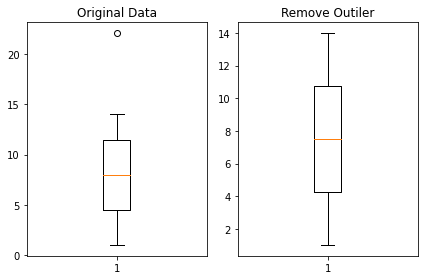

In [28]:
dt = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure() # 새로운 figure를 생성
fig_1 = fig.add_subplot(1,2,1)
fig_2 = fig.add_subplot(1,2,2)

fig_1.set_title('Original Data')
fig_1.boxplot(dt)

# numpy를 이용하여 사분위수 구하기
print(np.median(dt))
print(np.percentile(dt,25)) # 1사분위값
print(np.percentile(dt,50)) # 2사분위값
print(np.percentile(dt,75)) # 3사분위값

# IQR 구하기
iqr_value = np.percentile(dt,75) - np.percentile(dt,25)

upper_fense = np.percentile(dt,75) + (iqr_value * 1.5)
lower_fense = np.percentile(dt,25) - (iqr_value * 1.5)

# 이상치 출력
print(dt[(dt > upper_fense) | (dt < lower_fense)])

# 이상치 제외
result = dt[(dt <= upper_fense) & (dt >= lower_fense)]

fig_2.set_title('Remove Outiler')
fig_2.boxplot(result)

fig.tight_layout()
plt.show()

## 2. Z -score

In [29]:
from scipy import stats

zscore_threshold = 1.8 # 2.0이 optimal value

dt = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

# Outlier 출력
outlier = dt[np.abs(stats.zscore(dt)) > zscore_threshold]
print(dt[np.abs(((dt - dt.mean()) / dt.std()) > zscore_threshold)])

# Outlier 제거
dt[np.isin(dt, outlier, invert=True)]

[22.1]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

# 이상치 처리를 이용한 단순 회귀 분석
---
## 1. Tukey fense를 이용한 단순 회귀 분석

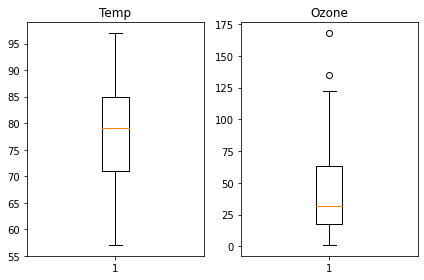

In [10]:
# 일단 그래프 그려서 확인
fig_t = plt.figure()
fig_t1 = fig_t.add_subplot(1,2,1)
fig_t2 = fig_t.add_subplot(1,2,2)

fig_t1.set_title('Temp')
fig_t1.boxplot(data['Temp'])

fig_t2.set_title('Ozone')
fig_t2.boxplot(data['Ozone'])

fig_t.tight_layout()

In [24]:
# 이상치 제거
iqr_value = np.percentile(data['Ozone'],75) - np.percentile(data['Ozone'],25)

upper_fense = np.percentile(data['Ozone'],75) + (iqr_value * 1.5)
lower_fense = np.percentile(data['Ozone'],25) - (iqr_value * 1.5)

# 이상치 확인
print('Outlier')
display(data[(data['Ozone'] > upper_fense) | (data['Ozone'] < lower_fense)])

result_t = data[(data['Ozone'] <= upper_fense) & (data['Ozone'] >= lower_fense)]
print('Remove Outlier')
display(result_t)

Outlier


,Temp,Ozone
61,84,135.0
116,81,168.0


Remove Outlier


,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


In [25]:
# 1. training data
x_data = result_t['Temp'].values.reshape(-1,1)
t_data = result_t['Ozone'].values.reshape(-1,1)

# 2. X 와 T node
X = tf.placeholder(shape=[None,1], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 3. W, b
W = tf.Variable(tf.random.normal([1,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 4. 모델
H = tf.matmul(X, W) + b

# 5. loss
loss = tf.reduce_mean(tf.square(H - T))

# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-6).minimize(loss)

# 7. seession
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [33]:
# 8. 학습
for step in range(300000):
    _,W_val,b_val,loss_val = sess.run([train, W, b, loss], 
                                      feed_dict={X : x_data, T : t_data})
    
    if step % 30000 == 0:
        print('W : {}, b : {} , loss : {}'.format(W_val,b_val,loss_val))

W : [[0.5546871]], b : [-0.85951084] , loss : 676.5438842773438
W : [[0.55627257]], b : [-0.9846806] , loss : 676.023681640625
W : [[0.55785793]], b : [-1.1098503] , loss : 675.50390625
W : [[0.55944335]], b : [-1.23502] , loss : 674.984619140625
W : [[0.5610288]], b : [-1.3601898] , loss : 674.4657592773438
W : [[0.5626142]], b : [-1.4853595] , loss : 673.9473876953125
W : [[0.5641996]], b : [-1.6105293] , loss : 673.429443359375
W : [[0.56578505]], b : [-1.735699] , loss : 672.9119873046875
W : [[0.5673704]], b : [-1.8608688] , loss : 672.39501953125
W : [[0.56895584]], b : [-1.9860386] , loss : 671.87841796875


In [34]:
# 9. 예측 
print(sess.run(H, feed_dict={X : [[82]]}))

[[44.673054]]


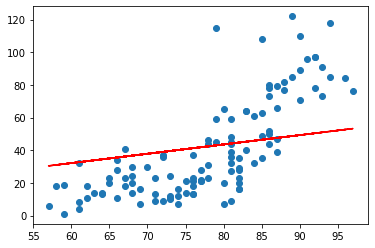

In [35]:
# sklearn과 비교? 이거 위에 있는걸로 비교?
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*W_val + b_val, color='r')
plt.show()

## 2. Z-score

In [18]:
# 이상치 제거
data_o = data.copy()
data_o.loc[:,['Ozone']] = (data_o['Ozone'] - data_o['Ozone'].mean()) / data_o['Ozone'].std()

zscore_threshold = 1.8

# 이상치
display(data_o.loc[np.abs(data_o['Ozone']) > zscore_threshold])

# 이상치 제거
result_z = data_o.loc[np.abs(data_o['Ozone']) <= zscore_threshold]

,Temp,Ozone
29,79,2.209014
61,84,2.815297
85,85,1.996815
98,89,2.421213
100,90,2.057443
116,81,3.815664
120,94,2.299956


In [21]:
# 1. training data
x_data = result_z['Temp'].values.reshape(-1,1)
t_data = result_z['Ozone'].values.reshape(-1,1)

# 2. X 와 T node
X = tf.placeholder(shape=[None,1], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 3. W, b
W = tf.Variable(tf.random.normal([1,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 4. 모델
H = tf.matmul(X, W) + b

# 5. loss
loss = tf.reduce_mean(tf.square(H - T))

# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# 7. seession
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [22]:
# 8. 학습
for step in range(300000):
    _,W_val,b_val,loss_val = sess.run([train, W, b, loss], 
                                      feed_dict={X : x_data, T : t_data})
    
    if step % 30000 == 0:
        print('W : {}, b : {} , loss : {}'.format(W_val,b_val,loss_val))

W : [[-0.36202285]], b : [-0.27364218] , loss : 806.7474365234375
W : [[0.00746782]], b : [-0.67456394] , loss : 0.5246478915214539
W : [[0.01219995]], b : [-1.0460231] , loss : 0.47861433029174805
W : [[0.01653412]], b : [-1.386244] , loss : 0.4399959444999695
W : [[0.02050472]], b : [-1.6979258] , loss : 0.40759092569351196
W : [[0.02414116]], b : [-1.9833773] , loss : 0.38040798902511597
W : [[0.02747118]], b : [-2.2447748] , loss : 0.3576079308986664
W : [[0.03052162]], b : [-2.4842262] , loss : 0.33847731351852417
W : [[0.03331758]], b : [-2.7037024] , loss : 0.3224169611930847
W : [[0.03587497]], b : [-2.9044502] , loss : 0.30896180868148804


In [32]:
# 9. 예측 
print(sess.run(H, feed_dict={X : [[82]]}))

[[44.62483]]


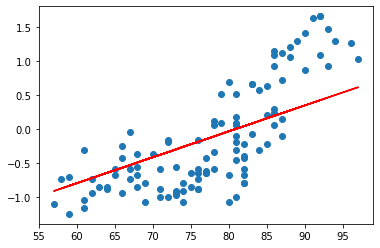

In [23]:
# sklearn과 비교? 이거 위에 있는걸로 비교?
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*W_val + b_val, color='r')
plt.show()
